<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/Dropout_Notebook_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train=np.linspace(-1,1,20)

In [3]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test=np.linspace(-1,1,20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

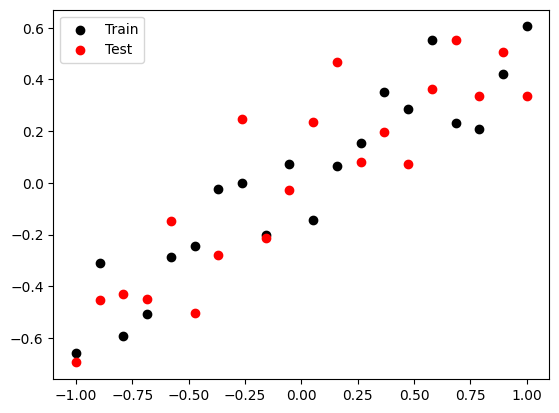

In [7]:
plt.scatter(X_train,y_train,c='black',label="Train")
plt.scatter(X_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

# Regression Model

In [8]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=1))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation="linear"))
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)


In [9]:
# evalutate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=0)
_,test_mse=model.evaluate(X_test,y_test,verbose=0)
print('Train:{},Test:{}'.format(train_mse,test_mse))


Train:0.004489081911742687,Test:0.04637095704674721


In [10]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 98ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

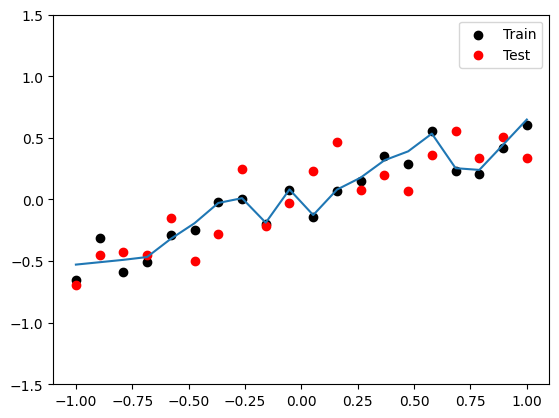

In [11]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show
# As you can see in the graph below that our model is capturing the black points which is training data but not covering the red points which are testing data so its clearly indicates that overfitiing is happeining here.

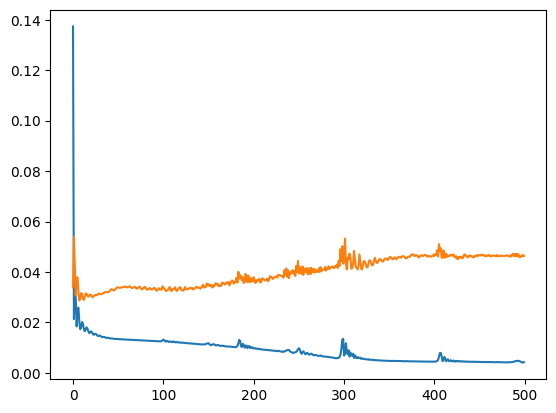

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Another proof of overfiting is shown in this graph. as you can see that the their is huge diffrence between the training loss and tesinting loss clearly shows that overfiting is happeining here.

# Dorpout Model
## Now puting dropout to reduce the overfiting

In [18]:
model=Sequential()

model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])

history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [19]:
# evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=0)
_,test_mse=model.evaluate(X_test,y_test,verbose=0)
print('Train:{},Test:{}'.format(train_mse,test_mse))

Train:0.016380563378334045,Test:0.036058209836483


In [20]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 75ms/step


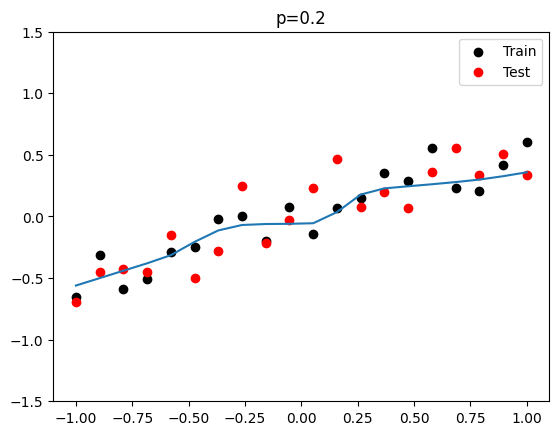

In [21]:
plt.figure()
plt.title('p=0.2')
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

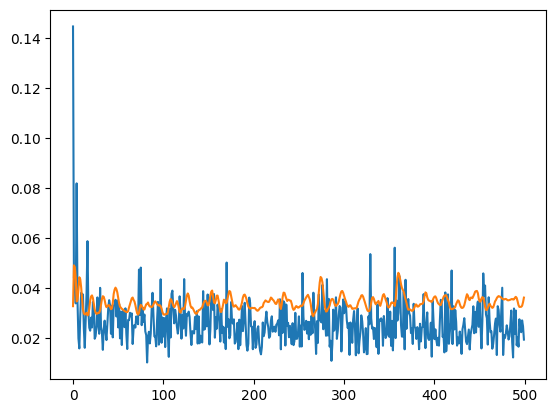

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])